In [35]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from geopy import distance
from sklearn.metrics import explained_variance_score

In [3]:
data1 = pd.read_csv("eda4.csv", nrows = 1_000_000)

In [4]:
data1['distance'] = data1.apply(lambda x: distance.distance((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],x['dropoff_longitude'])).miles, axis=1)

In [8]:
data1.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,...,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,distance
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,...,6,15,0,1,0,1,1,1,1,0.639764
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,...,1,5,0,1,0,2,1,1,1,5.246511
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,...,8,18,0,0,1,4,1,1,1,0.863167
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,...,4,21,0,0,1,6,0,1,1,1.737223
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,...,3,9,1,0,0,2,1,0,1,1.241710


In [27]:
data1 = data1.drop(['Unnamed: 0', 'key', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'time', 'log_date', 'log_time',
       'log_hour', 'log_min', 'log_year', 'log_month', 'log_day', '7to15',
       '16to19', '20to6', 'dayofweek', 'weekday', 'is_extracharge'], axis = 1)

In [29]:
import xgboost
from sklearn.metrics import mean_squared_error

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   fare_amount      1000000 non-null  float64
 1   passenger_count  1000000 non-null  int64  
 2   taxi_amount      1000000 non-null  int64  
 3   distance         1000000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 30.5 MB


In [31]:
x = data1.drop(['fare_amount'], axis = 1)
y = data1.fare_amount

X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)
xgb_model = xgboost.XGBRegressor(n_estimators=100, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

800000 200000


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

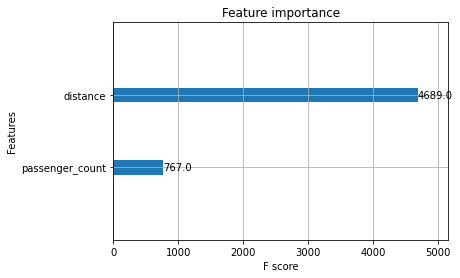

In [32]:
xgboost.plot_importance(xgb_model)

In [33]:
y_pred = xgb_model.predict(X_test)
y_pred

array([ 5.9348445,  5.7969832, 28.601496 , ...,  6.1388435, 17.37484  ,
       12.612947 ], dtype=float32)

In [37]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(y_pred ,y_test))

0.7873179439658312
0.6351350116205224


In [38]:
xg_rmse = mean_squared_error(y_pred, y_test)
xg_rmse

26.27657752719766